In [1]:
import os
import sys
import importlib

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

sys.path.append(
    'C:\\Users\\danny\\Documents_Local\\Caltech_2023-2024\\CS101\\'
    'EMIT-ECOSTRESS\\modules'
)
import data.Datasets
import models.Feedforward
import models.Attention
import utils.train

In [2]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
device

'cuda'

In [74]:
# Make datasets and dataloaders
importlib.reload(data.Datasets)

pca_dim = ''
omit_components = 0
white = True

batch_size = 8192

base_data_path = (
    'C:\\Users\\danny\\Documents_Local\\Caltech_2023-2024\\CS101\\Data\\'
    'P2P_Data_Random'
)

if white:
    white_str = '_white'
else:
    white_str = ''
pca_dim_str: str = str(pca_dim) + white_str


train_dataset = data.Datasets.EmitEcostressDataset(
    emit_data_path=os.path.join(
            base_data_path, 'Train', f'emit_train_random_pca{pca_dim_str}.pkl'
    ),
    omit_components=omit_components,
    ecostress_data_path=os.path.join(
        base_data_path, 'Train', 'ecostress_train_random.pkl'
    ),
    ecostress_center=None,
    ecostress_scale=None,
    device=device,
)

val_dataset = data.Datasets.EmitEcostressDataset(
    emit_data_path=os.path.join(
            base_data_path, 'Val', f'emit_val_random_pca{pca_dim_str}.pkl'
    ),
    omit_components=omit_components,
    ecostress_data_path=os.path.join(
        base_data_path, 'Val', 'ecostress_val_random.pkl'
    ),
    ecostress_center=None,
    ecostress_scale=None,
    device=device
)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size)

In [75]:
# Make model, optimizer, and loss function
importlib.reload(models.Feedforward)
importlib.reload(models.Attention)

n_epochs = 50

model = models.Feedforward.ToyModel(
    input_dim=train_dataset.input_dim
)

if device == 'cuda':
    model = model.cuda()

optimizer = optim.Adam(params=model.parameters(), lr=0.001, weight_decay=0)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer=optimizer, factor=0.5, patience=3
)
# scheduler = None

loss_fn = nn.MSELoss(reduction='sum')

model

ToyModel(
  (linear_output): Linear(in_features=244, out_features=1, bias=True)
)

In [76]:
importlib.reload(utils.train)
train_loss, val_loss = utils.train.train(
    model,
    optimizer,
    scheduler,
    loss_fn,
    train_loader,
    val_loader,
    n_epochs=n_epochs,
    loss_interval=1,
    device=device,
)

Epoch 000		Train Loss: 1.2144		Val Loss: 1.2153 		LR: 0.001		Time: 35.679238080978394
Epoch 001		Train Loss: 0.70236		Val Loss: 0.42074 		LR: 0.001		Time: 34.88422393798828
Epoch 002		Train Loss: 0.29233		Val Loss: 0.18314 		LR: 0.001		Time: 35.16789984703064
Epoch 003		Train Loss: 0.13287		Val Loss: 0.097879 		LR: 0.001		Time: 36.46331286430359
Epoch 004		Train Loss: 0.081071		Val Loss: 0.074581 		LR: 0.001		Time: 39.580239057540894
Epoch 005		Train Loss: 0.068405		Val Loss: 0.070918 		LR: 0.001		Time: 34.932629108428955
Epoch 006		Train Loss: 0.066004		Val Loss: 0.071705 		LR: 0.001		Time: 34.67050075531006
Epoch 007		Train Loss: 0.065645		Val Loss: 0.073158 		LR: 0.001		Time: 34.933382511138916
Epoch 008		Train Loss: 0.065666		Val Loss: 0.074594 		LR: 0.001		Time: 34.69908905029297
Epoch 009		Train Loss: 0.065769		Val Loss: 0.075905 		LR: 0.0005		Time: 34.76763725280762
Epoch 010		Train Loss: 0.067336		Val Loss: 0.067963 		LR: 0.0005		Time: 34.89618492126465
Epoch 011		Train Loss: 0

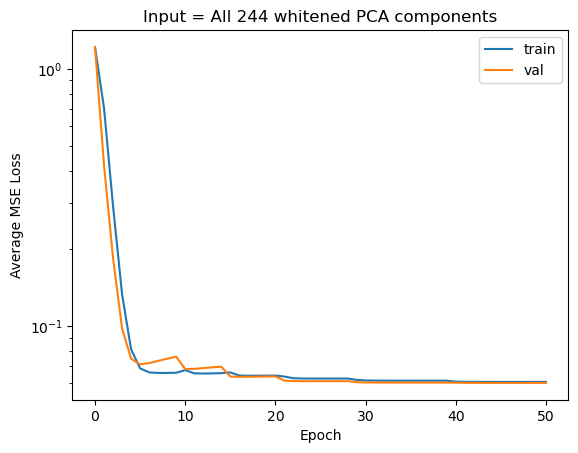

In [80]:
fig, ax = plt.subplots()
ax.set_title('Input = '
            #  f'{pca_dim - omit_components}'
            #  f'{white_str.replace("_white", " whitened")} '
             'All 244 whitened PCA components'
)
ax.semilogy(np.arange(len(train_loss)), train_loss, label='train')
ax.semilogy(np.arange(len(val_loss)), val_loss, label='val')
ax.set_xlabel('Epoch')
ax.set_ylabel('Average MSE Loss')
ax.legend()
plt.show(fig)